In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline

In [2]:
df= pd.read_csv("salida_final.csv", index_col=0)

In [3]:
df.index = pd.to_datetime(df.index)

In [4]:
#df[["ALUA", "MERVAL"]]

In [5]:
porc = df.pct_change()
porc2 = porc.dropna(axis='columns',thresh=25)
porc2 

,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT,MERVAL
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.056250,-0.032014,-0.006319,-0.064935,-0.039823,-0.016832,-0.013910,-0.041850,-0.017886,-0.011340,...,-0.004934,-0.006667,-0.001692,0.000000,0.027027,-0.035088,-0.017241,-0.025157,0.084906,-0.014786
2020-01-06,0.023179,0.046823,-0.014308,0.047840,0.036866,0.020141,0.017241,0.055172,0.033940,-0.008342,...,-0.016529,-0.015660,-0.011864,0.019608,0.000000,-0.009091,-0.008772,-0.003226,-0.034783,0.023964
2020-01-07,-0.006472,0.009585,0.000000,-0.008837,-0.022222,0.024679,-0.036980,-0.008715,-0.007206,0.008412,...,-0.033613,0.034091,0.008576,0.055769,0.000000,0.045872,-0.017699,-0.016181,-0.045045,-0.008535
2020-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-21,0.002062,-0.027470,-0.019765,0.000000,0.033233,-0.007063,-0.021033,0.014672,0.007171,0.002990,...,-0.035503,0.006993,0.036557,-0.023199,0.008696,0.011905,-0.015000,0.017391,0.000000,0.006555
2022-02-22,0.008230,0.017074,0.002574,0.050914,0.011696,-0.014644,-0.028646,0.039574,0.025043,0.001490,...,-0.032720,-0.020833,0.002275,-0.050000,0.000000,0.000000,0.008460,-0.029915,0.053763,0.004566
2022-02-23,0.004082,0.020725,-0.002995,-0.024845,0.010116,0.019108,-0.035523,0.073939,0.011976,-0.008929,...,0.029598,-0.010638,0.021566,0.002632,0.000000,0.000000,-0.008389,0.026432,0.022959,0.010161
2022-02-24,-0.034553,-0.052995,-0.025751,-0.031847,-0.021459,0.000417,-0.052120,-0.040900,-0.031006,-0.039039,...,0.043121,-0.017921,0.000000,0.032808,0.000000,0.000000,-0.028765,0.001431,-0.029925,-0.028876


In [6]:
#porc2.describe()

In [7]:
est = porc2.iloc[97:349]
est 

,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT,MERVAL
2020-05-29,0.027356,-0.051737,-0.012937,-0.066874,-0.023715,-0.049479,0.009247,-0.043367,-0.071286,-0.004065,...,-0.030000,0.018116,-0.018519,0.005450,0.010989,0.011111,0.000000,-0.017476,-0.034031,-0.029782
2020-06-01,0.050296,0.060534,0.015727,0.061667,0.036437,0.068493,0.087696,0.074667,0.068706,0.059864,...,0.048969,0.064057,0.000000,0.029810,0.000000,0.002747,-0.004587,0.047431,0.013550,0.057958
2020-06-02,0.039437,0.059332,0.021935,0.034537,0.023438,0.074359,0.014440,0.084367,0.084380,0.050064,...,0.002457,0.016722,0.022642,0.026316,-0.021739,0.171233,0.027650,0.094340,0.034759,0.050493
2020-06-03,0.018970,0.109536,0.021465,-0.003035,-0.003817,0.065632,0.002372,0.036613,0.087077,0.008557,...,-0.004902,0.032895,0.049815,-0.012821,0.022222,-0.005848,0.013453,0.027586,0.015504,0.043188
2020-06-04,0.019947,-0.013099,-0.025958,-0.031963,-0.034483,-0.007839,-0.029586,0.026490,0.000852,-0.036364,...,-0.004926,-0.035032,0.003515,-0.025974,-0.021739,-0.005882,0.053097,-0.018456,0.012723,-0.004033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,-0.010601,0.013024,0.038233,0.043880,-0.006270,0.073529,0.041791,0.144044,0.025781,0.036424,...,0.022650,-0.023055,0.102389,0.039474,0.025200,0.013986,0.007937,0.038394,0.041344,0.029628
2021-06-08,-0.014286,-0.018233,-0.031111,-0.022124,-0.028391,-0.044002,0.020057,0.019370,-0.044352,-0.036741,...,-0.008859,-0.023599,-0.003096,-0.029536,0.005587,-0.013793,-0.025591,-0.028571,-0.009926,-0.025838
2021-06-09,0.030797,0.068095,-0.007864,0.054299,0.016234,0.029961,0.022472,0.086698,0.045792,0.041459,...,0.022346,0.027190,0.049689,0.028986,0.001111,0.000000,0.026263,0.064014,0.040100,0.025828
2021-06-10,0.001757,-0.003790,-0.017173,-0.006438,0.054313,-0.015177,-0.001374,-0.086339,0.009467,-0.003185,...,-0.010929,-0.005882,0.005917,0.028169,0.052164,0.000000,0.007874,-0.032520,0.019277,0.000582


In [8]:
# y = est[["MERVAL"]]
# resultados ={}
# for col in est.columns[:-1]:
#     X = est[[col]]
#     model = LinearRegression().fit(X,y)
#     resultados[col] = model

# rows = []
# for stock in est.columns[:-1]:
#     model = resultados[stock]
    
#     row = {}
    
#     row["intercept"] = model.intercept_[0]
#     row["coef"] = model.coef_[0][0]
    
#     X = est[[stock]]
#     row["R2"] = model.score(X,y)
    
#     y_p = model.predict(X)
    
    
#     rows.append(row)
    
# skr = pd.DataFrame(rows, index =est.columns[:-1])


In [9]:
y = est[["MERVAL"]]
rows = []
for col in est.columns[:-1]:
    row = {}
    
    X = est[[col]]
    
    model = sm.OLS(endog=y, exog=sm.add_constant(X))
    result = model.fit()
    
    intercept, coef = result.params.to_numpy()
    row["intercept"] = intercept
    row["coef"] = coef
    
    row["R2"] = result.rsquared
    row["bse"] = result.bse.to_numpy()[0]
    
    rows.append(row)
    
smr = pd.DataFrame(rows, index=est.columns[:-1])

In [10]:
smr.head()

,intercept,coef,R2,bse
ALUA,0.000883,0.590928,0.408046,0.001211
BBAR,0.000928,0.575255,0.766293,0.000759
BYMA,0.000645,0.611298,0.317762,0.001304
CEPU,0.001285,0.617137,0.627233,0.000958
COME,0.001611,0.554979,0.405535,0.001209


In [11]:
win = slice(350, 370)
win

slice(350, 370, None)

In [12]:
merval_window = porc2["MERVAL"].iloc[win]
merval_window 

2021-06-15    0.002529
2021-06-16    0.008502
2021-06-17   -0.016801
2021-06-18   -0.019630
2021-06-22    0.011754
2021-06-23    0.002858
2021-06-24    0.012757
2021-06-25   -0.026886
2021-06-28   -0.015086
2021-06-29   -0.018376
2021-07-01   -0.014484
2021-07-02    0.020471
2021-07-05    0.023973
2021-07-06   -0.019824
2021-07-08   -0.018744
2021-07-12    0.029560
2021-07-13    0.002483
2021-07-15   -0.013828
2021-07-16   -0.006202
2021-07-19   -0.015179
Name: MERVAL, dtype: float64

In [13]:
columns = {}
for stock in smr.index:
    stock_smr = smr.loc[stock]
    expected_returns = stock_smr.intercept + merval_window * stock_smr.coef
    expected_returns.name = stock
    
    columns[stock] = expected_returns
    

ereturns = pd.DataFrame(columns)
ereturns

,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLA,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT
2021-06-15,0.002377,0.002382,0.002190,0.002845,0.003015,0.001389,0.003499,0.001862,0.002399,0.002057,...,0.001947,0.004108,0.002709,0.002966,0.003381,0.002450,0.002316,0.003203,0.003343,0.002562
2021-06-16,0.005907,0.005819,0.005842,0.006532,0.006330,0.003751,0.006439,0.004680,0.006200,0.005036,...,0.004816,0.007774,0.004117,0.005435,0.005784,0.002626,0.003011,0.006169,0.006398,0.003608
2021-06-17,-0.009045,-0.008737,-0.009626,-0.009084,-0.007713,-0.006251,-0.006013,-0.007254,-0.009901,-0.007581,...,-0.007337,-0.007751,-0.001848,-0.005022,-0.004395,0.001880,0.000068,-0.006392,-0.006541,-0.000821
2021-06-18,-0.010717,-0.010364,-0.011355,-0.010829,-0.009283,-0.007369,-0.007405,-0.008588,-0.011701,-0.008992,...,-0.008696,-0.009487,-0.002515,-0.006191,-0.005534,0.001797,-0.000262,-0.007796,-0.007988,-0.001316
2021-06-22,0.007829,0.007689,0.007830,0.008539,0.008135,0.005036,0.008040,0.006214,0.008269,0.006658,...,0.006378,0.009769,0.004884,0.006779,0.007093,0.002721,0.003389,0.007783,0.008061,0.004177
2021-06-23,0.002572,0.002572,0.002391,0.003048,0.003197,0.001519,0.003661,0.002018,0.002608,0.002221,...,0.002105,0.004310,0.002787,0.003102,0.003513,0.002459,0.002355,0.003367,0.003511,0.002620
2021-06-24,0.008422,0.008266,0.008443,0.009158,0.008691,0.005433,0.008533,0.006687,0.008908,0.007158,...,0.006860,0.010384,0.005121,0.007193,0.007496,0.002751,0.003506,0.008281,0.008574,0.004352
2021-06-25,-0.015005,-0.014539,-0.015791,-0.015308,-0.013310,-0.010238,-0.010976,-0.012011,-0.016319,-0.012611,...,-0.012181,-0.013939,-0.004226,-0.009190,-0.008453,0.001583,-0.001106,-0.011398,-0.011698,-0.002586
2021-06-28,-0.008032,-0.007750,-0.008577,-0.008025,-0.006761,-0.005573,-0.005169,-0.006445,-0.008810,-0.006726,...,-0.006513,-0.006699,-0.001444,-0.004313,-0.003705,0.001931,0.000267,-0.005541,-0.005664,-0.000521
2021-06-29,-0.009976,-0.009643,-0.010589,-0.010056,-0.008587,-0.006874,-0.006788,-0.007997,-0.010903,-0.008367,...,-0.008094,-0.008718,-0.002220,-0.005673,-0.005029,0.001834,-0.000116,-0.007174,-0.007346,-0.001097


In [14]:
# columns = {}
# for stock_name, stock_smr in smr.iterrows():
#     expected_returns = stock_smr.intercept + merval_window * stock_smr.coef    
#     columns[stock_name] = expected_returns
    
# ereturns = pd.DataFrame(columns)
# ereturns

In [15]:
anormalreturn= ereturns - porc2.iloc[350:370,:-1]
anormalreturn

,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLA,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT
2021-06-15,0.000662,0.005882,0.000186,0.010597,0.000029,0.021064,0.014223,0.026000,0.000273,0.006827,...,-0.018750,-0.012841,0.011507,-0.005485,0.019956,-0.008077,-0.032649,0.022508,0.023343,0.007562
2021-06-16,-0.011216,0.003477,0.001175,-0.002397,0.009306,0.006369,-0.001691,0.001146,-0.018042,-0.001354,...,-0.041075,-0.035560,0.015952,0.020798,0.026852,0.013042,0.003011,0.014043,-0.008908,-0.019005
2021-06-17,0.006106,0.001541,-0.030196,-0.011296,0.010197,0.049304,-0.003325,0.009178,0.008738,-0.007581,...,-0.022643,0.012483,0.016116,0.002070,0.019995,0.054512,0.000068,-0.010360,-0.006541,0.040948
2021-06-18,0.014924,-0.000688,-0.010705,0.039943,0.021112,0.019958,-0.002014,0.018858,0.013623,0.003706,...,0.017435,0.023122,0.027973,-0.006191,0.006231,0.001797,-0.020532,-0.007796,0.027188,-0.001316
2021-06-22,0.002566,0.001970,0.011083,0.019004,-0.029483,0.018369,0.012105,0.008668,-0.013382,-0.015850,...,0.015666,0.026623,-0.013984,-0.014650,-0.010765,-0.019501,0.010012,0.031498,0.068825,0.034946
2021-06-23,-0.027097,0.033377,0.010877,-0.000477,-0.014930,-0.005237,-0.009944,-0.022583,0.015324,-0.030798,...,-0.013520,-0.012833,0.002787,0.018487,0.003513,0.013329,0.002355,-0.006755,-0.029760,0.007911
2021-06-24,-0.011917,0.014379,0.001860,0.007987,-0.026917,0.010226,-0.012943,-0.001717,0.012281,-0.040026,...,0.003270,0.004766,0.026726,0.012875,-0.001276,0.002751,0.003506,0.012289,0.006785,0.009671
2021-06-25,-0.003377,0.015720,0.022142,-0.000103,-0.056290,0.009030,0.004792,-0.016773,0.026758,0.051343,...,0.029209,0.013994,0.011547,-0.017762,0.008938,0.001583,0.012228,0.024819,0.007945,0.037521
2021-06-28,0.002052,0.023959,0.007738,0.020478,-0.078190,0.035193,-0.001164,0.030285,0.001158,-0.030018,...,-0.019307,0.010542,-0.030290,-0.018478,0.019893,-0.003564,0.040808,-0.018067,0.012551,-0.028376
2021-06-29,-0.033745,0.019175,-0.011280,-0.010056,0.001669,-0.025819,0.009298,0.042433,0.024173,-0.015954,...,-0.002830,-0.001700,-0.027142,-0.005673,0.007055,-0.014560,-0.000116,0.019630,-0.037031,0.012453


In [16]:
#smr[["bse"]].T

In [17]:
auxt = 1 / smr[["bse"]]
auxt.columns = ["1/bse"]
ttest = anormalreturn * auxt.T.to_numpy()
ttest

,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLA,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT
2021-06-15,0.546628,7.749353,0.142826,11.062210,0.024337,17.088363,11.413492,22.431149,0.411872,5.199186,...,-13.057186,-9.752413,7.636753,-3.826173,13.457181,-5.159746,-21.003975,16.676507,16.669247,5.184032
2021-06-16,-9.263392,4.581382,0.901308,-2.501639,7.695312,5.166473,-1.356760,0.989075,-27.207330,-1.030964,...,-28.603583,-27.007180,10.586898,14.509261,18.107666,8.331927,1.937183,10.404390,-6.361346,-13.028894
2021-06-17,5.043200,2.030062,-23.154775,-11.791548,8.432420,39.997937,-2.668073,7.917835,13.176785,-5.774043,...,-15.768284,9.480651,10.695746,1.444050,13.483556,34.824312,0.043464,-7.675848,-4.670977,28.071241
2021-06-18,12.325976,-0.905935,-8.208502,41.695596,17.458014,16.190876,-1.616400,16.269177,20.543317,2.822757,...,12.141212,17.560726,18.564902,-4.319194,4.202020,1.147855,-13.208722,-5.776145,19.415071,-0.902241
2021-06-22,2.118959,2.594961,8.498433,19.837639,-24.379925,14.902161,9.713344,7.477799,-20.180366,-12.071674,...,10.909519,20.219774,-9.280832,-10.220028,-7.259098,-12.457937,6.441010,23.337234,49.147380,23.956616
2021-06-23,-22.379431,43.972645,8.340563,-0.497740,-12.345625,-4.248755,-7.979628,-19.482494,23.108172,-23.455344,...,-9.414981,-9.746194,1.849391,12.896798,2.369301,8.515016,1.514722,-5.004558,-21.251754,5.423007
2021-06-24,-9.842680,18.943396,1.426073,8.337303,-22.258108,8.296210,-10.386359,-1.480921,18.519194,-30.483996,...,2.277313,3.620004,17.737263,8.982048,-0.860296,1.757412,2.255616,9.104946,4.844926,6.630084
2021-06-25,-2.789192,20.709521,16.978737,-0.107578,-46.547096,7.325465,3.845624,-14.470334,40.350899,39.102573,...,20.340179,10.627961,7.663354,-12.391019,6.027572,1.011275,7.866401,18.388322,5.673151,25.721741
2021-06-28,1.694986,31.564999,5.933545,21.376774,-64.656142,28.550102,-0.933817,26.127188,1.746523,-22.861768,...,-13.444668,8.006776,-20.103018,-12.890535,13.415161,-2.276742,26.252785,-13.385570,8.962519,-19.452707
2021-06-29,-27.870196,25.262429,-8.649290,-10.496697,1.380421,-20.945645,7.460903,36.608341,36.452569,-12.150592,...,-1.971079,-1.291259,-18.013511,-3.957713,4.757895,-9.301353,-0.074405,14.544171,-26.443750,8.537266


In [18]:
#columns = {}
#for stock_name, bse_inv in auxt.iterrows():
 #   bse_inv =  bse_inv.to_numpy()[0]
 #   columns[stock_name] = anormalreturn[stock_name] *  bse_inv
    
#pd.DataFrame(columns)

In [19]:
ttestrecorte =ttest[["GARO", "BOLT","YPFD", "MOLI", "ALUA"]]
print(ttestrecorte.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &       GARO &       BOLT &       YPFD &       MOLI &       ALUA \\
\midrule
2021-06-15 &  -0.146093 &  21.496399 &  -1.830088 &  -9.752413 &   0.546628 \\
2021-06-16 &   1.962800 & -17.435530 &   4.683568 & -27.007180 &  -9.263392 \\
2021-06-17 &  -3.376326 &   2.616369 &  33.254119 &   9.480651 &   5.043200 \\
2021-06-18 &   1.176034 &   6.133710 &   6.716686 &  17.560726 &  12.325976 \\
2021-06-22 &   2.237748 &  -8.670455 & -25.564483 &  20.219774 &   2.118959 \\
2021-06-23 &   9.464794 &   1.884314 &  23.362004 &  -9.746194 & -22.379431 \\
2021-06-24 &  -5.756464 &   3.496308 &  -8.774504 &   3.620004 &  -9.842680 \\
2021-06-25 &  -1.029482 &  -0.992453 &  34.960057 &  10.627961 &  -2.789192 \\
2021-06-28 &  -1.627551 &   0.934662 &  24.501056 &   8.006776 &   1.694986 \\
2021-06-29 &  -3.493732 &  -1.573218 &  22.522985 &  -1.291259 & -27.870196 \\
2021-07-01 &   3.187469 & -42.472651 & -30.296250 & -37.011841 &  22.423294 \\
2021-07-02 &  -0.2

In [20]:
#      test_anormal_returns = 1/stock_smr.bse * auxt[stock_name]
#      columns[stock_name] = ttestanormal_returns
    
# ttestanormal_returns = pd.DataFrame(columns)
# ttestanormal_returns

In [21]:
ttest.to_csv (r'ttestresult.csv', index = True, header=True)

<AxesSubplot:>

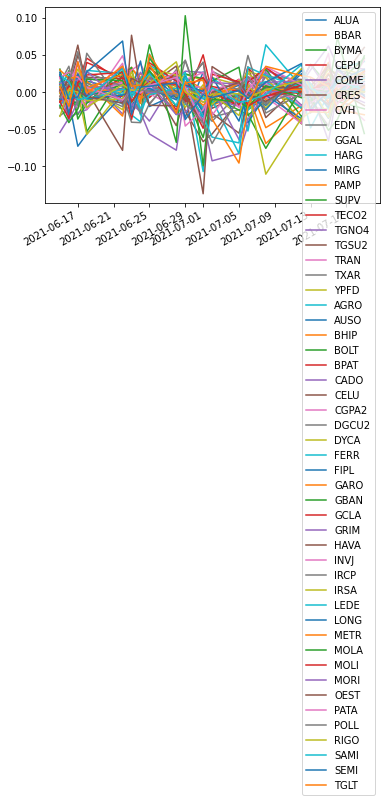

In [22]:
anormalreturn.plot()

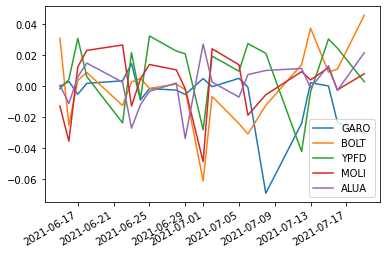

In [36]:
ARR= anormalreturn[["GARO", "BOLT","YPFD", "MOLI", "ALUA"]]
ARR.plot()
plt.savefig("lineaanormalesretornos.png")

In [23]:
porc2 

,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT,MERVAL
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.056250,-0.032014,-0.006319,-0.064935,-0.039823,-0.016832,-0.013910,-0.041850,-0.017886,-0.011340,...,-0.004934,-0.006667,-0.001692,0.000000,0.027027,-0.035088,-0.017241,-0.025157,0.084906,-0.014786
2020-01-06,0.023179,0.046823,-0.014308,0.047840,0.036866,0.020141,0.017241,0.055172,0.033940,-0.008342,...,-0.016529,-0.015660,-0.011864,0.019608,0.000000,-0.009091,-0.008772,-0.003226,-0.034783,0.023964
2020-01-07,-0.006472,0.009585,0.000000,-0.008837,-0.022222,0.024679,-0.036980,-0.008715,-0.007206,0.008412,...,-0.033613,0.034091,0.008576,0.055769,0.000000,0.045872,-0.017699,-0.016181,-0.045045,-0.008535
2020-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-21,0.002062,-0.027470,-0.019765,0.000000,0.033233,-0.007063,-0.021033,0.014672,0.007171,0.002990,...,-0.035503,0.006993,0.036557,-0.023199,0.008696,0.011905,-0.015000,0.017391,0.000000,0.006555
2022-02-22,0.008230,0.017074,0.002574,0.050914,0.011696,-0.014644,-0.028646,0.039574,0.025043,0.001490,...,-0.032720,-0.020833,0.002275,-0.050000,0.000000,0.000000,0.008460,-0.029915,0.053763,0.004566
2022-02-23,0.004082,0.020725,-0.002995,-0.024845,0.010116,0.019108,-0.035523,0.073939,0.011976,-0.008929,...,0.029598,-0.010638,0.021566,0.002632,0.000000,0.000000,-0.008389,0.026432,0.022959,0.010161
2022-02-24,-0.034553,-0.052995,-0.025751,-0.031847,-0.021459,0.000417,-0.052120,-0.040900,-0.031006,-0.039039,...,0.043121,-0.017921,0.000000,0.032808,0.000000,0.000000,-0.028765,0.001431,-0.029925,-0.028876


<AxesSubplot:>

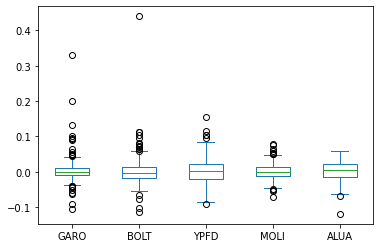

In [24]:
est[["GARO", "BOLT","YPFD", "MOLI", "ALUA"]].plot.box()

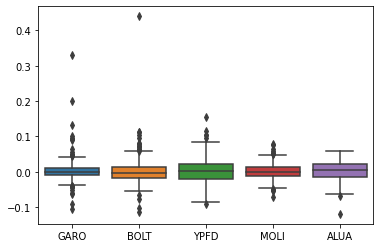

In [25]:
ax = sns.boxplot(data=est[["GARO", "BOLT","YPFD", "MOLI", "ALUA"]])
plt.savefig("cajasXsector.png")

<AxesSubplot:ylabel='Frequency'>

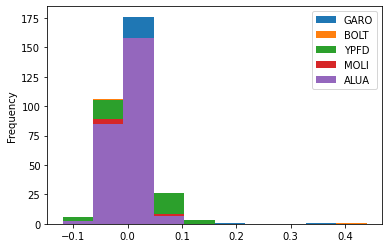

In [26]:
est[["GARO", "BOLT","YPFD", "MOLI", "ALUA"]].plot.hist()

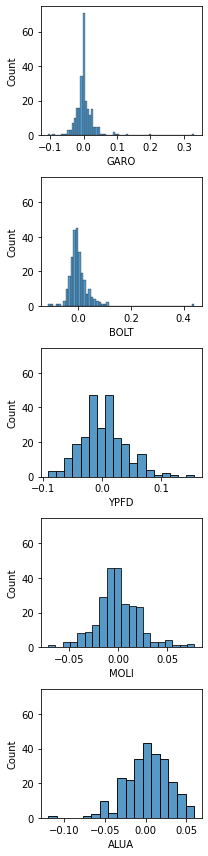

In [27]:
fig, axs =plt.subplots(5,1 , figsize =(3,12), sharey=True)
for nc,ax in zip(est[["GARO", "BOLT","YPFD", "MOLI", "ALUA"]],axs):
    sns.histplot(data=est[nc], ax=ax)
    

fig.tight_layout()
plt.savefig("HistXsector.png")


In [28]:
desc = est[["GARO", "BOLT","YPFD", "MOLI", "ALUA"]].describe()
desc.loc["Kurt"] = est[["GARO", "BOLT","YPFD", "MOLI", "ALUA"]].kurtosis()
desc.loc["Asim"] = est[["GARO", "BOLT","YPFD", "MOLI", "ALUA"]].skew()
desc.index = ['n', 'Media', 'Desviación stantdar', 'Mínimo', 'Q1', 'Mediana', 'Q3', 'Máximo', 'Coef. Curtosis',
       'Coef. Asimetría']
desc

,GARO,BOLT,YPFD,MOLI,ALUA
n,252.000000,252.000000,252.000000,252.000000,252.000000
Media,0.003658,0.001531,0.002433,-0.000251,0.002573
Desviación stantdar,0.035398,0.041726,0.037658,0.021918,0.026828
Mínimo,-0.106003,-0.113978,-0.090828,-0.071581,-0.119433
Q1,-0.008529,-0.017429,-0.021283,-0.012157,-0.013993
Mediana,0.000000,-0.003775,0.001356,-0.001112,0.004038
Q3,0.011845,0.013268,0.022737,0.012148,0.021293
Máximo,0.331169,0.440129,0.155483,0.077922,0.059627
Coef. Curtosis,33.259729,48.403257,0.874792,1.414126,1.068956
Coef. Asimetría,4.077274,4.850969,0.536533,0.339903,-0.553898


In [29]:
print(desc.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &        GARO &        BOLT &        YPFD &        MOLI &        ALUA \\
\midrule
n                   &  252.000000 &  252.000000 &  252.000000 &  252.000000 &  252.000000 \\
Media               &    0.003658 &    0.001531 &    0.002433 &   -0.000251 &    0.002573 \\
Desviación stantdar &    0.035398 &    0.041726 &    0.037658 &    0.021918 &    0.026828 \\
Mínimo              &   -0.106003 &   -0.113978 &   -0.090828 &   -0.071581 &   -0.119433 \\
Q1                  &   -0.008529 &   -0.017429 &   -0.021283 &   -0.012157 &   -0.013993 \\
Mediana             &    0.000000 &   -0.003775 &    0.001356 &   -0.001112 &    0.004038 \\
Q3                  &    0.011845 &    0.013268 &    0.022737 &    0.012148 &    0.021293 \\
Máximo              &    0.331169 &    0.440129 &    0.155483 &    0.077922 &    0.059627 \\
Coef. Curtosis      &   33.259729 &   48.403257 &    0.874792 &    1.414126 &    1.068956 \\
Coef. Asimetría     &    4.077274 &    4.8509

In [30]:
z = est[["GARO", "BOLT","YPFD", "MOLI", "ALUA"]]
z



,GARO,BOLT,YPFD,MOLI,ALUA
2020-05-29,0.015135,-0.023569,-0.011185,-0.030000,0.027356
2020-06-01,-0.001065,0.058621,0.051300,0.048969,0.050296
2020-06-02,-0.003198,0.016287,0.061674,0.002457,0.039437
2020-06-03,-0.021390,0.009615,0.060645,-0.004902,0.018970
2020-06-04,-0.004372,0.000000,0.006244,-0.004926,0.019947
...,...,...,...,...,...
2021-06-07,0.002469,-0.016173,0.069575,0.022650,-0.010601
2021-06-08,-0.029557,-0.013699,-0.043103,-0.008859,-0.014286
2021-06-09,0.025381,0.036111,0.001540,0.022346,0.030797
2021-06-10,-0.002475,-0.018767,0.023778,-0.010929,0.001757


In [31]:
testnormal = z.apply(sm.stats.diagnostic.normal_ad).T
testnormal.columns = ["Estad. AD", "p-valor AD"]
testnormal

/home/nadia/garpar/lib/python3.9/site-packages/statsmodels/stats/_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


,Estad. AD,p-valor AD
GARO,inf,0.000000
BOLT,inf,0.000000
YPFD,1.089668,0.007272
MOLI,1.522792,0.000622
ALUA,0.569342,0.138639


In [32]:
z.to_csv ('z.csv', index = True, header=True)

In [33]:
testnormal
estadCS = [80.73, 44.67, 13.07,21.24, 8.58]
gl= [3,2,6,5,5]
pvalorCS =[0.00000,0.00000,0.04209, 0.00073, 0.12696]
testnormal['Estad. CS'] = estadCS
testnormal['Grados de libertad CS'] = gl
testnormal["p-valor CS"]=pvalorCS

testnormal

,Estad. AD,p-valor AD,Estad. CS,Grados de libertad CS,p-valor CS
GARO,inf,0.000000,80.73,3,0.00000
BOLT,inf,0.000000,44.67,2,0.00000
YPFD,1.089668,0.007272,13.07,6,0.04209
MOLI,1.522792,0.000622,21.24,5,0.00073
ALUA,0.569342,0.138639,8.58,5,0.12696


In [34]:
print(testnormal.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  Estad. AD &  p-valor AD &  Estad. CS &  Grados de libertad CS &  p-valor CS \\
\midrule
GARO &        inf &    0.000000 &      80.73 &                      3 &     0.00000 \\
BOLT &        inf &    0.000000 &      44.67 &                      2 &     0.00000 \\
YPFD &   1.089668 &    0.007272 &      13.07 &                      6 &     0.04209 \\
MOLI &   1.522792 &    0.000622 &      21.24 &                      5 &     0.00073 \\
ALUA &   0.569342 &    0.138639 &       8.58 &                      5 &     0.12696 \\
\bottomrule
\end{tabular}

